# Building a machine learning model for molecule solubility using python sklearn library.

## Loading the Dataset

Data set used: deleaney solubility with description - the dataset is related to solubility of molecules, the data is meant to determine if a molecule is soluble in water or solvent in water or wolvent which will help to identify whether the molecule will be good drung candidates

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("./delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


Spliting the dataframe into X and Y.
The dependent Variable / the output variable (Y) in this case logS column is the variable we are predicting using the X variable given in the dataset i.e columns MolLogP, MolWt, NumRotatableBonds and AromaticProportion. In this case there are multiple X, hence its a multivariable analysis.

In [62]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [63]:
x = df.drop("logS", axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


Data Splitting: Splitting data into train and test set

For this task we will be using sklearn library.

Splitting your dataset ensures:
- Training set: used to teach the model.
- Test set: used to check how well the model generalizes to unseen data.

```test_size=0.2``` → Means 20% of the data will be used for testing, and 80% for training.

```random_state=100``` → Sets a fixed seed for random shuffling so you get the same split every time you run the code (important for reproducibility).

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 100)

# Model Building

## Linear Regression

Training the model

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Applying the model

In [66]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

Evaluating model performance

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_true=y_train, y_pred=y_lr_train_pred)
lr_test_mse = mean_squared_error(y_true=y_test, y_pred=y_lr_test_pred)

lr_train_r2 = r2_score(y_true=y_train, y_pred=y_lr_train_pred)
lr_test_r2 = r2_score(y_true=y_test,y_pred=y_lr_test_pred)

In [68]:
df_perf = pd.DataFrame(["Linear Regression",lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
df_perf.columns =  ["Method","LR Train MSE","LR Train R2","LR Test MSE","LR Test R2"]
df_perf

,Method,LR Train MSE,LR Train R2,LR Test MSE,LR Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest Method

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [74]:
rf_train_mse = mean_squared_error(y_true=y_train, y_pred=y_rf_train_pred)
rf_test_mse = mean_squared_error(y_true=y_test, y_pred=y_rf_test_pred)

rf_train_r2 = r2_score(y_true=y_train, y_pred=y_rf_train_pred)
rf_test_r2 = r2_score(y_true=y_test,y_pred=y_rf_test_pred)

In [76]:
df_results = pd.DataFrame([["Random Forest",rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2],["Linear Regression",lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]])
df_results.columns =  ["Method","Train MSE","Train R2","Test MSE","Test R2"]
df_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,0.086228,0.979846,0.639617,0.867879
1,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Data Visualization of Prediction results

Text(0, 0.5, 'Experimental LogS values')

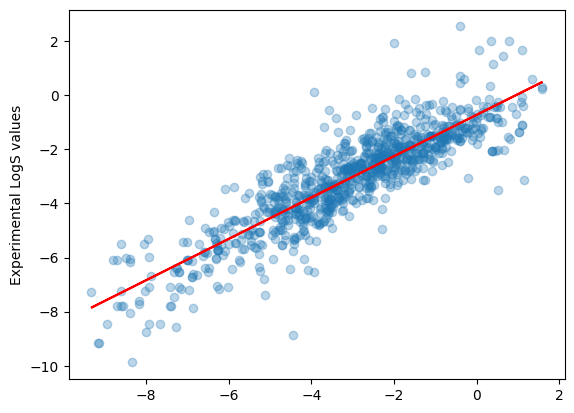

In [82]:
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

import numpy as np

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train),"#F00")
plt.ylabel("Predicted LogS values")
plt.ylabel("Experimental LogS values")

Text(0, 0.5, 'Experimental LogS values')

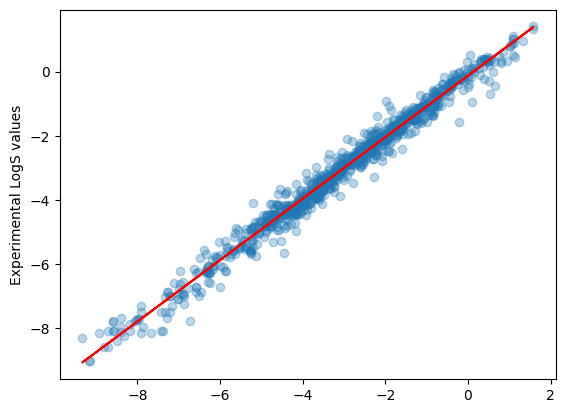

In [83]:
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_rf_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train),"#F00")
plt.ylabel("Predicted LogS values")
plt.ylabel("Experimental LogS values")